In [544]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/-datacleaningforbeginnerusingpandas/Data-cleaning-for-beginners-using-pandas.csv


In [545]:
df= pd.read_csv("/kaggle/input/-datacleaningforbeginnerusingpandas/Data-cleaning-for-beginners-using-pandas.csv")
df.head(10)

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1
5,5,44.0,$77k-$89k,1.4,"India,In",1999,TRUE
6,6,21.0,$44k-$99k,0.0,"New York,Ny",-1,-1
7,7,44.0,$44k-$99k,-1.0,Australia Aus,-1,-1
8,8,35.0,$44k-$99k,5.4,"New York,Ny",-1,-1
9,9,22.0,$44k-$99k,7.7,"India,In",-1,TRUE


In [546]:
# Se observan 29 filas con 7 columnas, se deben corregir tipo de columnas como por ejemplo quitar index, cambiar tipo edad a entero.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        29 non-null     int64  
 1   Age          22 non-null     float64
 2   Salary       29 non-null     object 
 3   Rating       28 non-null     float64
 4   Location     29 non-null     object 
 5   Established  29 non-null     int64  
 6   Easy Apply   29 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ KB


In [547]:
df.drop(columns='Index',axis=1, inplace=True) # Se quita columna index

In [548]:
df.describe() # Existen valores -1, decidir entre imputar o dejar como valor NaN

,Age,Rating,Established
count,22.000000,28.000000,29.000000
mean,39.045455,3.528571,1638.620690
std,16.134781,2.825133,762.079599
min,13.000000,-1.000000,-1.000000
25%,25.000000,1.050000,1935.000000
50%,39.500000,4.200000,1984.000000
75%,50.000000,5.400000,1999.000000
max,66.000000,7.800000,2020.000000


<Axes: >

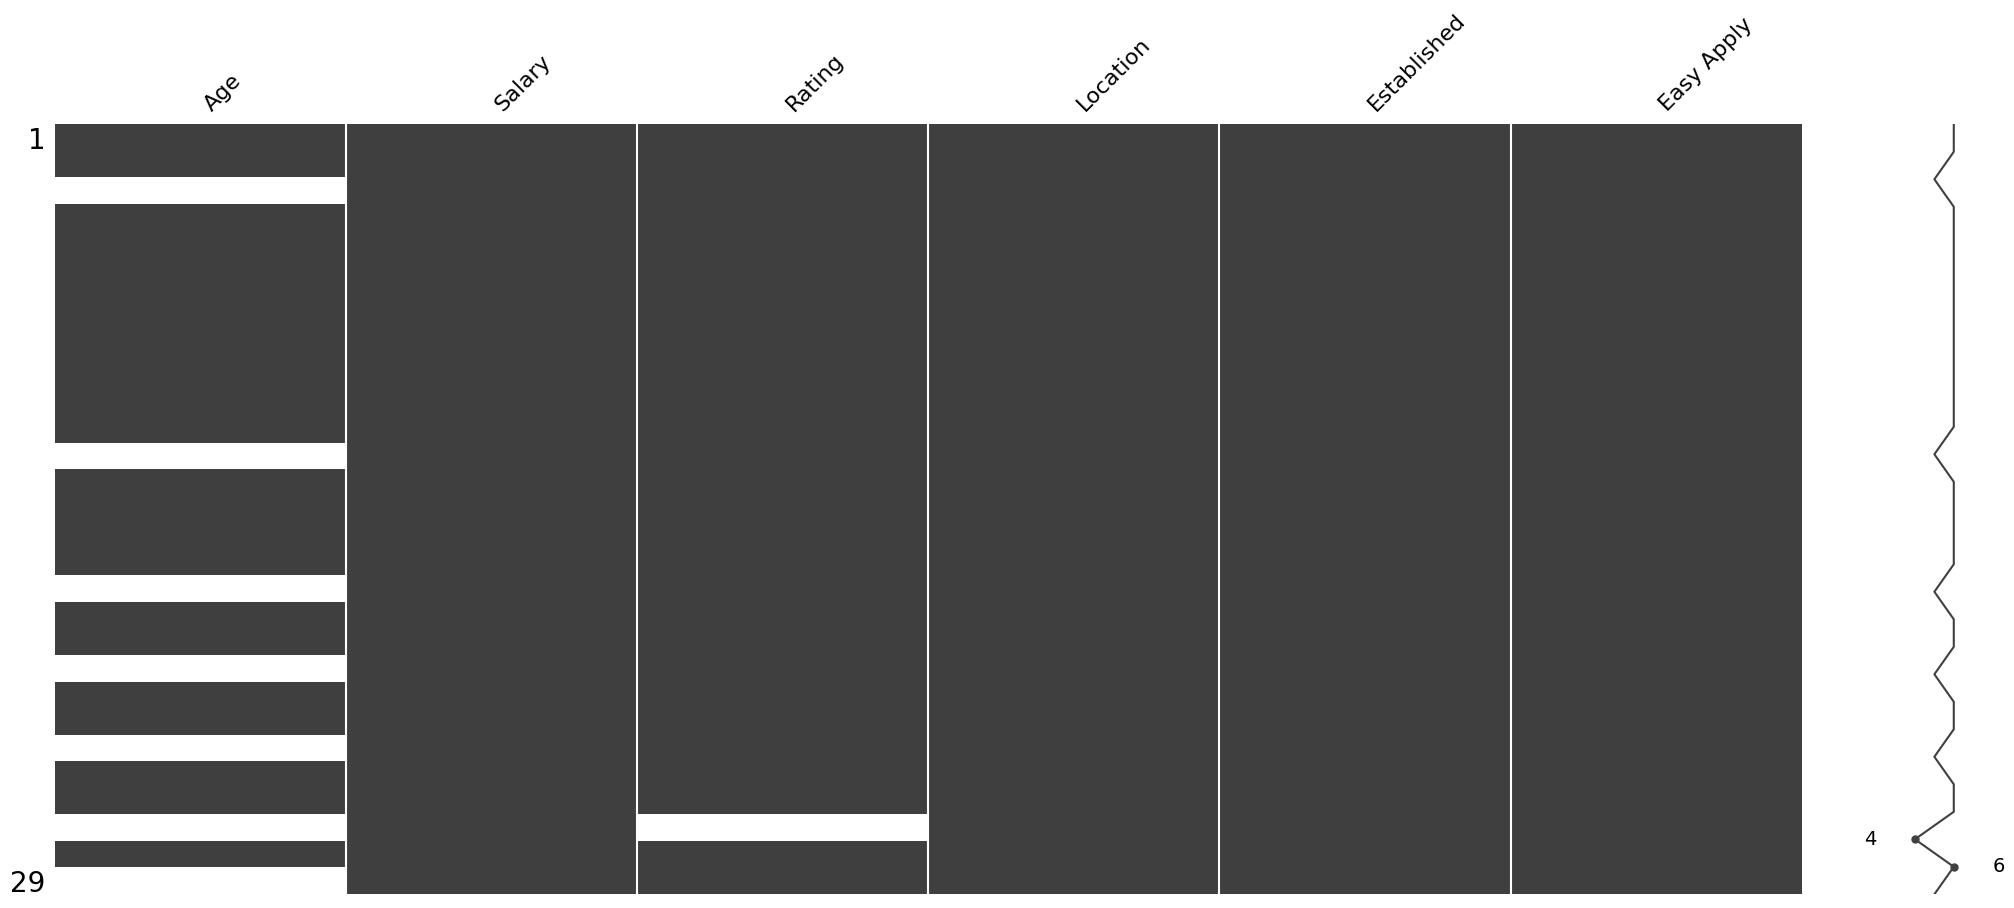

In [549]:
import missingno as msno
msno.matrix(df) # Visualización de valores nulos del dataframe en bruto

In [550]:
df.isna().sum()

Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64

In [551]:
df['Salary'].value_counts() # Salarios no siguen orden, existen intervalos que incluyen a otros
# Se opta por limpiar string y binarizar rangos

Salary
$44k-$99k     19
$55k-$66k      3
$77k-$89k      2
$10k-$49k      2
$88k-$101k     1
$19k-$40k      1
$39k-$88k      1
Name: count, dtype: int64

In [552]:
df['Rating'].value_counts() # valor -1 pasar a NaN

Rating
 5.4    4
-1.0    4
 0.0    3
 6.7    2
 4.5    1
 2.4    1
 7.8    1
 5.0    1
 5.7    1
 3.3    1
 5.3    1
 4.0    1
 3.0    1
 3.5    1
 7.7    1
 1.4    1
 6.4    1
 4.4    1
 3.4    1
Name: count, dtype: int64

In [553]:
df.loc[df['Rating'] == -1, 'Rating'] = np.nan # Pasan a NaN

In [554]:
df['Location']

0          India,In
1       New York,Ny
2       New York,Ny
3          India In
4     Australia Aus
5          India,In
6       New York,Ny
7     Australia Aus
8       New York,Ny
9          India,In
10         India,In
11         India,In
12         India,In
13    Australia Aus
14    Australia Aus
15    Australia Aus
16         India,In
17      New York,Ny
18      New York,Ny
19      New York,Ny
20      New York,Ny
21      New York,Ny
22      New York,Ny
23      New York,Ny
24      New York,Ny
25    Australia Aus
26         India,In
27         India,In
28    Australia Aus
Name: Location, dtype: object

In [555]:
# Se separa valores de Australia e India para que siga mismo formato a las demas localidades y se generan 2 columnas
df_separate_location = df['Location'].str.replace("Australia Aus", "Australia,Aus").str.replace("India In", "India,In").str.split(",", expand=True)
# Se quita columna original Location y se renombran las 2 generadas anteriormente
df = pd.concat([df, df_separate_location], axis=1).drop(columns='Location', axis=1).rename(columns={0:'Location', 1:'Location_abrev'})
df.head(5)

,Age,Salary,Rating,Established,Easy Apply,Location,Location_abrev
0,44.0,$44k-$99k,5.4,1999,TRUE,India,In
1,66.0,$55k-$66k,3.5,2002,TRUE,New York,Ny
2,NaN,$77k-$89k,NaN,-1,-1,New York,Ny
3,64.0,$44k-$99k,4.4,1988,-1,India,In
4,25.0,$44k-$99k,6.4,2002,-1,Australia,Aus


In [556]:
df['Established'] = df['Established'].replace(-1, np.nan) # Se reemplazan años -1 a NaN

In [557]:
# De momento pasa True a 1 y -1 a NaN
df['Easy Apply'] = np.where(df['Easy Apply'] == 'TRUE', 1, np.nan)
df.head(5)

,Age,Salary,Rating,Established,Easy Apply,Location,Location_abrev
0,44.0,$44k-$99k,5.4,1999.0,1.0,India,In
1,66.0,$55k-$66k,3.5,2002.0,1.0,New York,Ny
2,NaN,$77k-$89k,NaN,NaN,NaN,New York,Ny
3,64.0,$44k-$99k,4.4,1988.0,NaN,India,In
4,25.0,$44k-$99k,6.4,2002.0,NaN,Australia,Aus


In [558]:
# Se quitan simbolos $ y K
df['Salary'] = df['Salary'].str.replace('$', '').str.replace('k', '')

In [559]:
# Se pueden binarizar
df_salary_binarizado = pd.get_dummies(df, columns=['Salary'])
df_salary_binarizado.head(5)

,Age,Rating,Established,Easy Apply,Location,Location_abrev,Salary_10-49,Salary_19-40,Salary_39-88,Salary_44-99,Salary_55-66,Salary_77-89,Salary_88-101
0,44.0,5.4,1999.0,1.0,India,In,False,False,False,True,False,False,False
1,66.0,3.5,2002.0,1.0,New York,Ny,False,False,False,False,True,False,False
2,NaN,NaN,NaN,NaN,New York,Ny,False,False,False,False,False,True,False
3,64.0,4.4,1988.0,NaN,India,In,False,False,False,True,False,False,False
4,25.0,6.4,2002.0,NaN,Australia,Aus,False,False,False,True,False,False,False


In [560]:
conver_columns = df_salary_binarizado.columns[6:].tolist() # Se obtienen columnas binarizadas

In [561]:
df_salary_binarizado[convert_colums] = df_salary_binarizado[convert_colums].applymap(int) # Se pasan a enteros
df_salary_binarizado.head(5)

,Age,Rating,Established,Easy Apply,Location,Location_abrev,Salary_10-49,Salary_19-40,Salary_39-88,Salary_44-99,Salary_55-66,Salary_77-89,Salary_88-101
0,44.0,5.4,1999.0,1.0,India,In,0,0,0,1,0,0,0
1,66.0,3.5,2002.0,1.0,New York,Ny,0,0,0,0,1,0,0
2,NaN,NaN,NaN,NaN,New York,Ny,0,0,0,0,0,1,0
3,64.0,4.4,1988.0,NaN,India,In,0,0,0,1,0,0,0
4,25.0,6.4,2002.0,NaN,Australia,Aus,0,0,0,1,0,0,0


In [562]:
# Si se borraran filas que incluyeran NaN se perderían 20 registros de los 29 en total
print(f'Al borrar filas que incluyan NaN se perderían {df_salary_binarizado.shape[0] - df_salary_binarizado.dropna().shape[0]} registros de los {df_salary_binarizado.shape[0]} registros totales')

Al borrar filas que incluyan NaN se perderían 20 registros de los 29 registros totales


<Axes: >

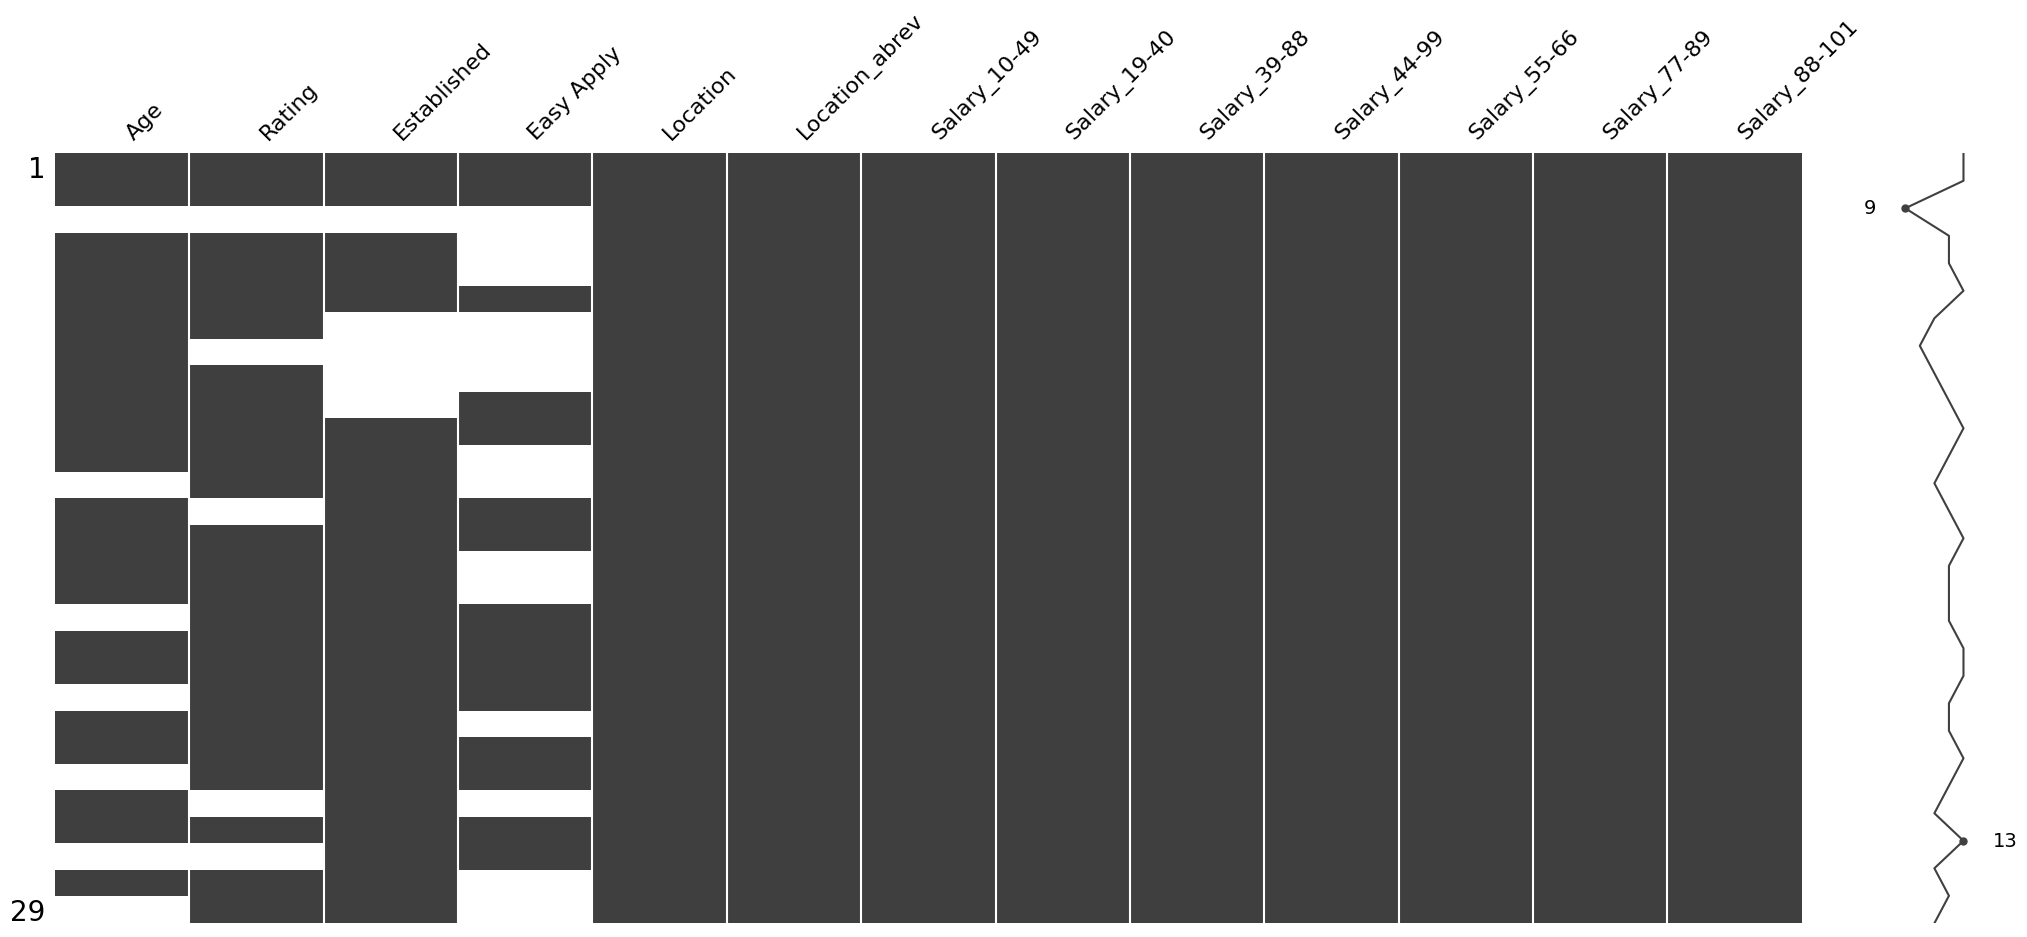

In [563]:
msno.matrix(df_salary_binarizado)

In [564]:
df_salary_binarizado.isna().sum() # Easy Apply es la columna con mayores valores perdidos, en este caso habría que consultar a que corresponden esos valores -1
# Para este caso se decide tomar como False

Age                7
Rating             5
Established        5
Easy Apply        14
Location           0
Location_abrev     0
Salary_10-49       0
Salary_19-40       0
Salary_39-88       0
Salary_44-99       0
Salary_55-66       0
Salary_77-89       0
Salary_88-101      0
dtype: int64

In [565]:
df_salary_binarizado['Easy Apply'] = df_salary_binarizado['Easy Apply'].fillna(0).astype(int) # Se rellenan los NaN con 0 o False

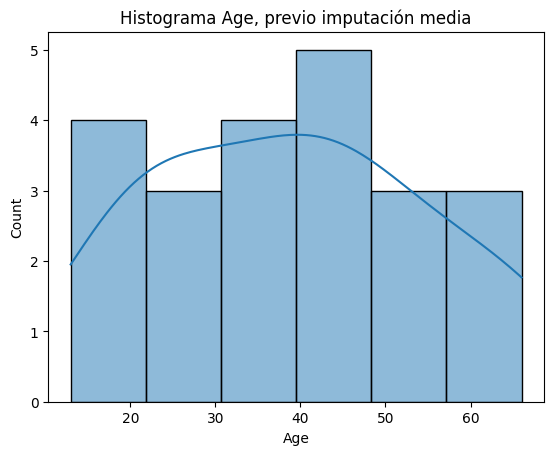

In [566]:
# Continuando, se podría imputar valores para la edad y rating
sns.histplot(df_salary_binarizado['Age'], kde=True)
plt.title('Histograma Age, previo imputación media');

In [567]:
df_salary_binarizado['Age'] = df_salary_binarizado['Age'].fillna(np.nanmedian(df_salary_binarizado['Age'])).astype(int) # Se imputa con promedio de edad

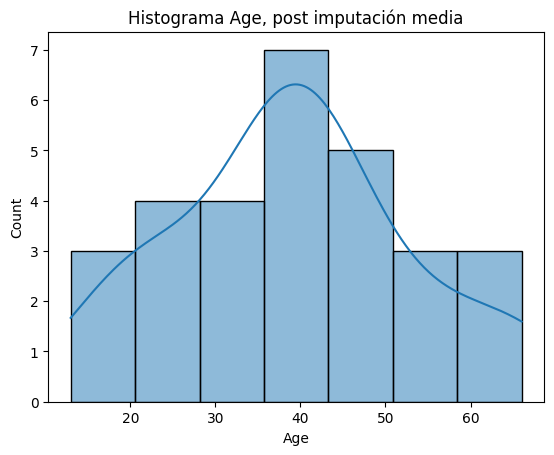

In [568]:
sns.histplot(df_salary_binarizado['Age'], kde=True)
plt.title('Histograma Age, post imputación media');
# Se observa que al imputar por el promedio de la edad la distribución se ve afectada, siendo esta edad mayormente representada al rellenar 7 valores nulos
# Muy poca la cantidad de datos, en un conjunto mas grande se podría utilizar otra técnica para imputar manteniendo misma distribución original

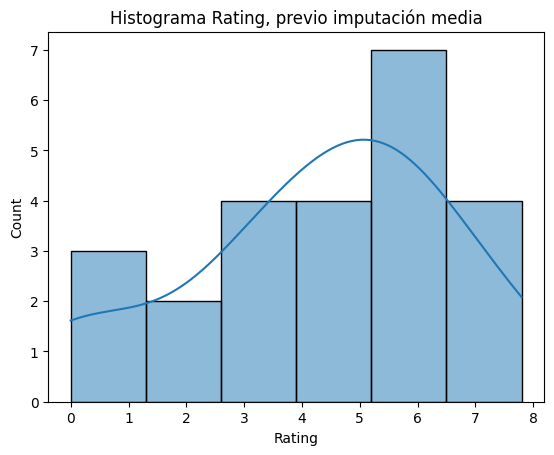

In [569]:
# Lo mismo para variable rating
sns.histplot(df_salary_binarizado['Rating'], kde=True)
plt.title('Histograma Rating, previo imputación media');

In [570]:
df_salary_binarizado['Rating'] = df_salary_binarizado['Rating'].fillna(np.nanmedian(df_salary_binarizado['Rating'])).astype(int)

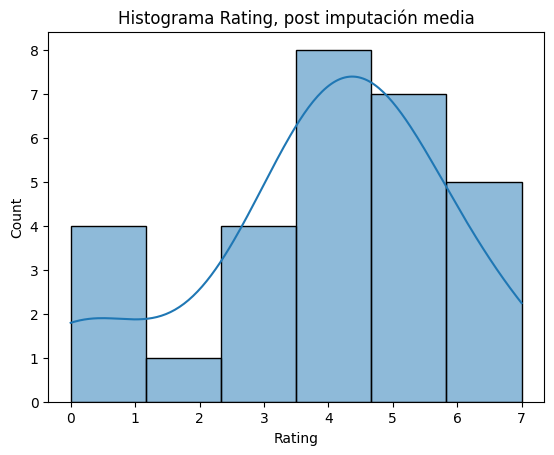

In [571]:
sns.histplot(df_salary_binarizado['Rating'], kde=True)
plt.title('Histograma Rating, post imputación media');

<Axes: >

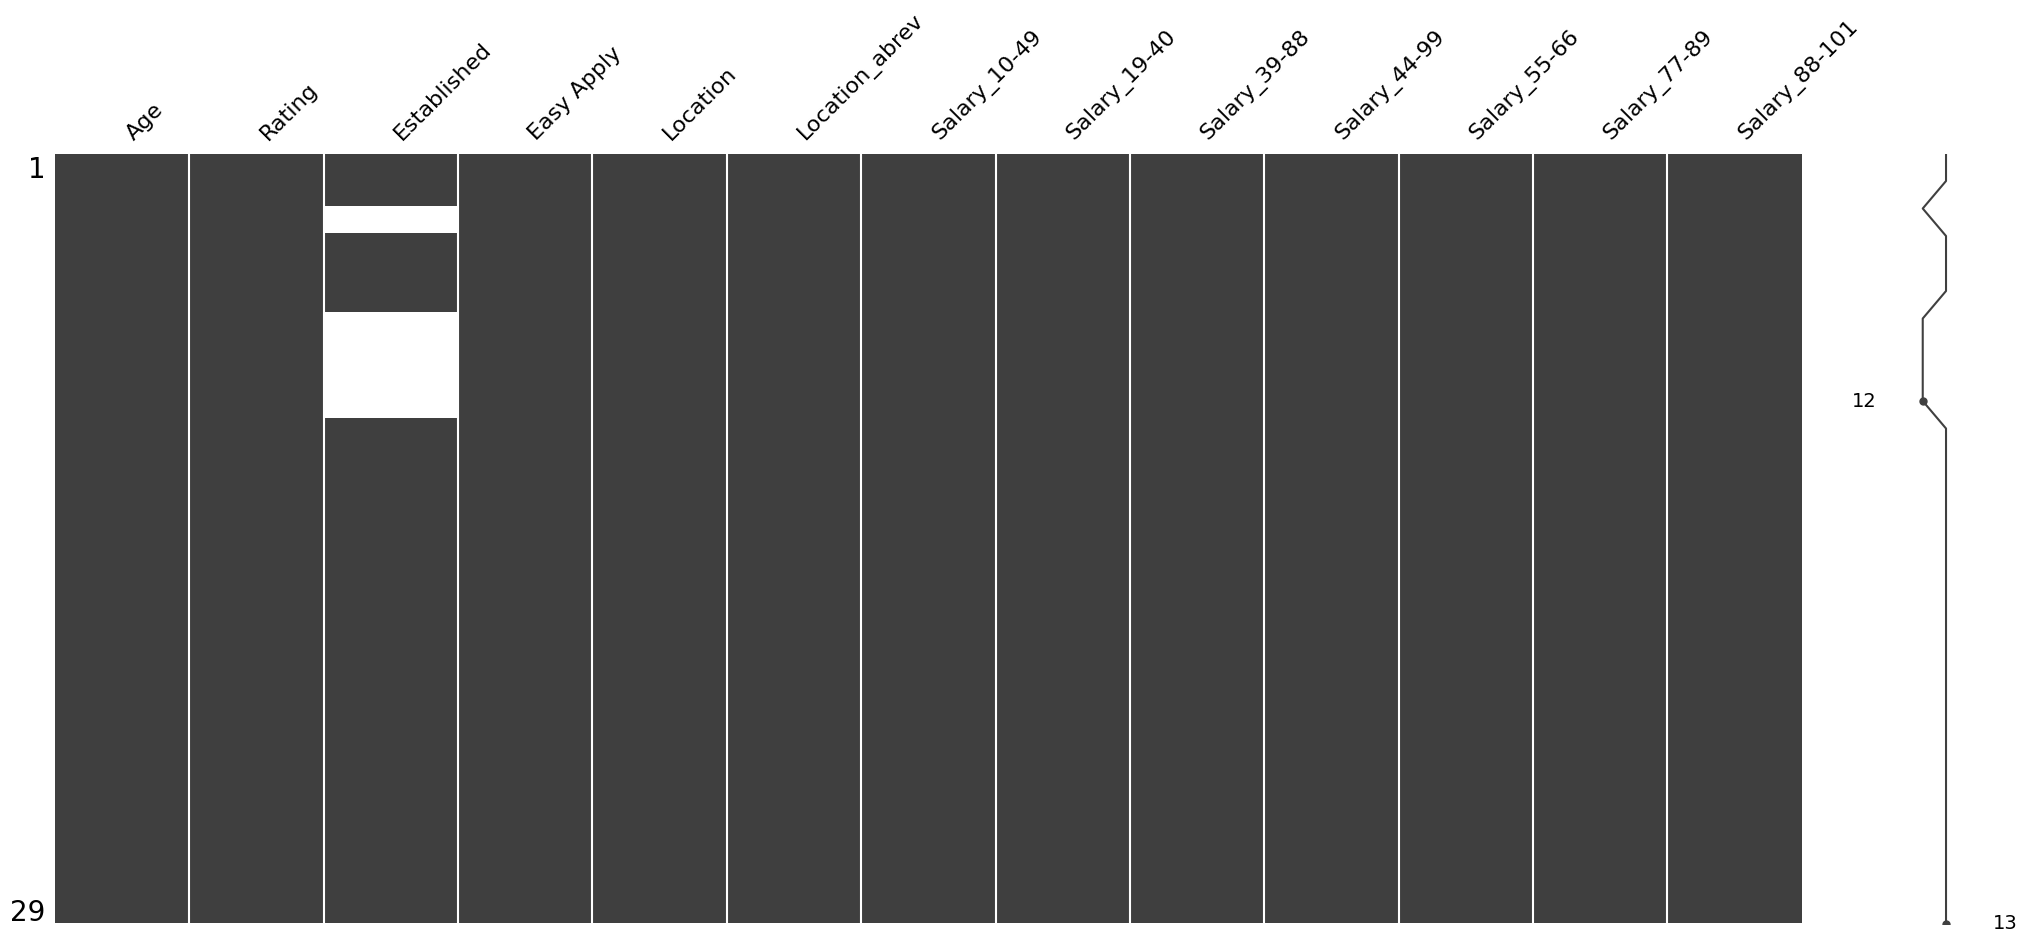

In [572]:
msno.matrix(df_salary_binarizado) # A continuación se debería decidir con el año "Established", si es relevante la variable para el análisis
# 1. Si no lo es, podría removerse la columa completa y no perder registros al omitir aquellos con valores nulos
# 2. Si lo es, remover dichas columnas y perder 5 registros, siendo estos casi un 17% de los datos

In [573]:
# Si se opta por la primera opción
#df_salary_binarizado.drop(columns='Established', axis=1, inplace=True)

In [574]:
# Si se opta por la segunda opción
# df_salary_binarizado.dropna(inplace=True) 

In [ ]:
df.to_csv('clean_dataset.csv', index=False) 